# 2. Plotting Nodes – Discrete Features
This notebook demonstrates the discrete plotting fuctionality for nodes that the function 'plot_discrete_nodes' provides, without any additional data attached to each element of the network.. This function, and notebook allows for and demonstrates the ability to:
- Plot both static (e.g., elevation, base demand) and time-varying attributes (pressure, demand);
- Specify whether to plot data at a specific timestep, or plot the mean, min, or max for time-varying attributes; 
- Bin datapoints into defined groups;
- Define node size, color, shape, and border for each defined group;
- Define whether a legend is drawn for each group, and determine the name of the legend and names of the groups;

- See <span style="color:dodgerblue"> 1.4</span> for already covered arguments

## <span style="color:dodgerblue"> plot_discrete_nodes() Function Information</span>
Description: Plotting function that gets, bins, and draws discrete node data.

Arguments:

- `model` - visplot model that contains necessary information about network;
- `ax` - matplotlib axes that the elements are being drawn on;


- `num_intervals (integer)` - number of intervals to be created (default = 5);
- `intervals (array of integers, string)` - array of intervals to be used, or set to 'automatic' (default = 'automatic');
- `parameter (string)` - name of parameter to be plotted (default = None);
- `value (int, string)` - takes ‘max’ ‘min’ ‘mean’ or an integer that represents the timestep index (default = None);


- `get_tanks (boolean)` - determines if the parameter is collected for tanks (default = False). 
- `get_reservoirs (boolean)` - determines if parameter is collected for reservoirs (default = False).


- `bin_size_list (list)` - list of each bin's node size (default = None);
- `bin_shape_list (list)` - list of each bin's marker shape (default = None);
- `bin_label_list (list)` - label that each bin will use if legend is drawn (default = None);
- `bin_border_list (list)` - list of each bin’s node border color (default = None);
- `bin_border_width_list (list)` - list of each bin’s node border width. (default = None);


- `savefig (boolean)` -  determines whether the figure is saved or not  (default = True);
- `save_name (string)` - if not defined, default save name will be the name of the network  (default = True); 


- `pumps (boolean)` -  determines whether to draw pumps or not (default = True);
- `valves (boolean)` -  determines whether to draw pumps or not  (default = True);
- `reservoirs (boolean)` -  determines whether to draw pumps or not  (default = True);
- `tanks (boolean)` -  determines whether to draw pumps or not  (default = True);


- `color_list (list)` - list of each bin’s node color (default = None);
- `cmap (string)` - colormap to be used for node colors (default = 'autumn_r');


- `legend (boolean)` - determines whether to draw legends or not (default = True);
- `legend_title (string)` - title of discrete/unique data legend (default = None);
- `legend_loc (string)` - location of base elements legend (default = 'upper right');
- `legend_loc2 (string)` - location of discrete/unique data legend (default = 'lower right');

## <span style="color:dodgerblue"> Import Libraries </span>

In [1]:
import visnet.network as visinit
import visnet.drawing as visplot

import matplotlib.pyplot as plt
import os

## <span style="color:dodgerblue"> Runs Network EPANET simulation, and stores necessary information about network into a dataframe </span>

In [2]:
#Initialize model
model = visinit.initialize_model('Networks\CTown.inp')

#Define the file path for images. By default, this is the location where the python file is located.
#Because of how Jupyter Notebook works, a relative path from the notebook can not be obtained.
cwd = os.getcwd()
model['image_path'] = cwd + '\Images'

D:\Applications\Anaconda3\envs\WaterQuality\lib\site-packages\wntr\epanet\io.py:2192: UserWarning: Not all curves were used in "D:\Class Projects\wdn-viz\Examples\Networks\CTown.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


## <span style="color:dodgerblue"> 2.1 Creating a Discrete Nodes Plot </span>

Notes:
- The only required argument is parameter. Without specifying parameter, an empty plot will be created. 


- The arguments get_tanks and get_reservoirs control whether the data for these elements are collected or not. Sometimes the datapoints for tanks/reservoirs can be significantly different from normal junctions, resulting in all junctions being put in one bin, while tanks/reservoirs are put in another. By default, get_tanks and get_reservoirs are set to False.


- The arguments tanks, reservoirs, pumps, valves determine if these elements are drawn or not.


- The unit argument can be used to convert to other units.


- Possible inputs that can be taken with only the parameter argument.
 - base_demand
 - elevation
 - emitter_coefficient
 - initial_quality

### <span style="color:mediumseagreen"> 2.1.1 Setting the parameter to be plotted

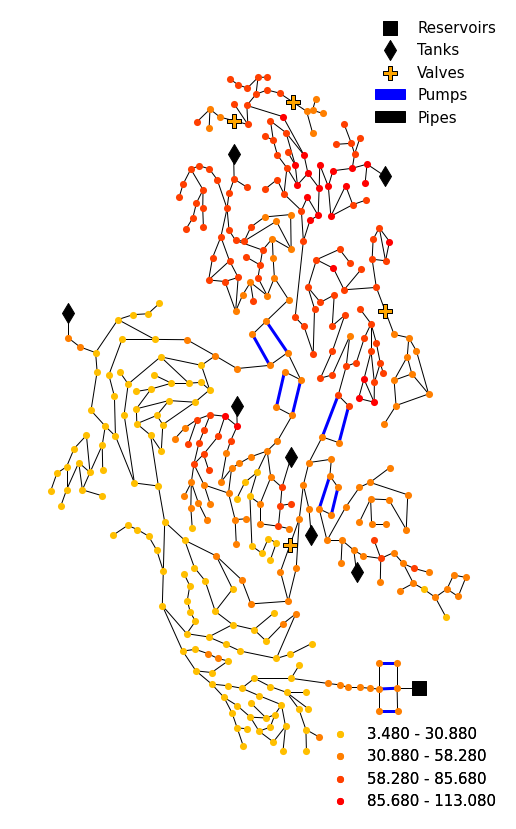

In [3]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation.
visplot.plot_discrete_nodes(model, ax, parameter='elevation')
plt.show()

### <span style="color:mediumseagreen"> 2.1.2 Determing if tanks, reservoirs, pumps, valves are drawn

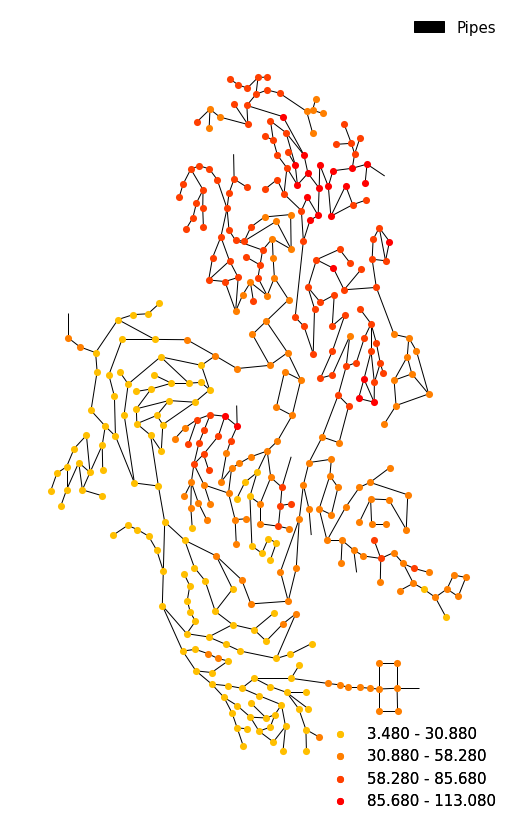

In [4]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation. Doesn't draw reservoirs, tanks, pumps or valves
visplot.plot_discrete_nodes(model, ax, parameter='elevation',reservoirs=False,tanks=False, pumps=False, valves=False)
plt.show()

### <span style="color:mediumseagreen"> 2.1.3 Getting parameter value for tanks and reservoirs

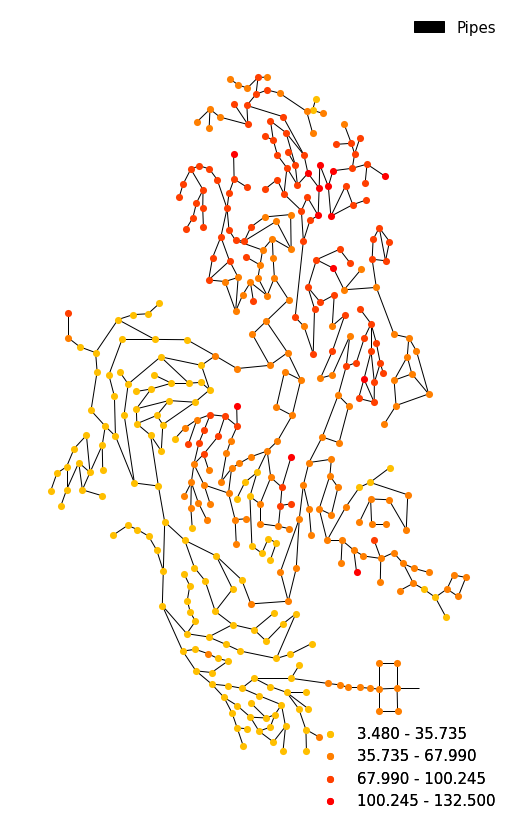

In [5]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation. Doesn't draw reservoirs, tanks, pumps or valves but does collect 
#tanks/reservoir datapoints
visplot.plot_discrete_nodes(model, ax, parameter='elevation',reservoirs=False,tanks=False, pumps=False, valves=False, 
                        get_tanks=True, get_reservoirs=True)
plt.show()

### <span style="color:mediumseagreen"> 2.1.4 Changing units

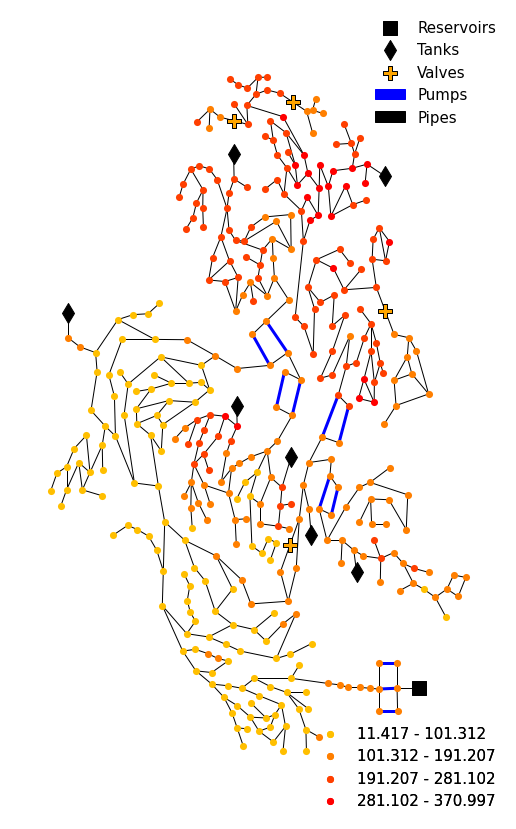

In [6]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation in feet. The default units are SI, and can be converted into units available in EPANET
visplot.plot_discrete_nodes(model, ax, parameter='elevation', unit='ft')
plt.show()

## <span style="color:dodgerblue"> 2.2 Creating a Discrete Nodes Plot - Static Parameters

Notes:
- Some parameters require an additional argument to be set. This argument is called value and can take an integer which represents the timestep, 'max', 'min', or 'mean'. 
    
    
- Possible inputs that can be taken when both parameter and value are used:
 - head; 
 - demand;
 - leak_demand;
 - leak area;
 - leak_discharg_coeff;
 - quality;

### <span style="color:mediumseagreen"> 2.2.1 Using Time-Dependent Parameters

TypeError: cannot unpack non-iterable NoneType object

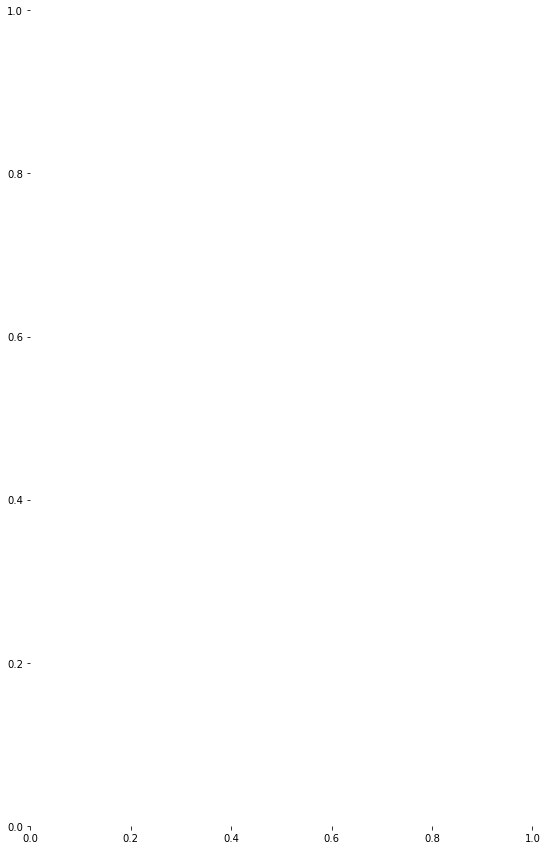

In [7]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of pressure at timestep 6.
visplot.plot_discrete_nodes(model, ax, parameter='pressure', value=6)
plt.show()

### <span style="color:mediumseagreen"> 2.2.2 Using 'max' Input

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of max pressure over all timesteps.
visplot.plot_discrete_nodes(model, ax, parameter='pressure', value='max')
plt.show()

### <span style="color:mediumseagreen"> 2.2.3 Using 'min' Input

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of min puressure over all timesteps.
visplot.plot_discrete_nodes(model, ax, parameter='pressure', value='min')
plt.show()

### <span style="color:mediumseagreen"> 2.2.4 Using 'mean' Input

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of mean puressure over all timesteps.
visplot.plot_discrete_nodes(model, ax, parameter='pressure', value='mean')
plt.show()

## <span style="color:dodgerblue"> 2.3 Creating a Discrete Nodes Plot - Bin Edges

Notes:
- By Default, the function will group the data into 5 bin edges, resulting in 4 distinct bins. This can be changed with the argument bin_edge_num.
    
    
- The argument intervals is by default set to 'Automatic' and as a result, the function will automatically create the specified number of intervals. By setting the argument intervals to an array of values, one can specify the exact intervals one wants to use. One thing to take notice to is that the function will automatically create new intervals if the specified intervals do not contain all datapoints. This is important when setting custom bin sizes, labels, etc.
    
### <span style="color:mediumseagreen"> 2.3.1 Specifying number of intervals

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation with 6 bin edges.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', bin_edge_num=6,legend_loc_2='lower left')
plt.show()

### <span style="color:mediumseagreen"> 2.3.2 Specifying intervals

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation with 6 bin edges and custom bin_edges.
visplot.plot_discrete_nodes(model, ax, parameter='elevation',bin_edge_num=6,bins=[0,25,50,75,100,125],legend_loc_2='lower left')
plt.show()

## <span style="color:dodgerblue"> 2.4 Creating A Discrete Nodes Plot - Marker Customization Options
    
Notes:
- The arguments bin_size_list, bin_shape_list, bin_border_list, bin_border_width_list, and bin_label_list are all marker/bin customization options available.
    
    
- Each of these arguments should be arrays. The length of the array should be equal to the number of bins, not the number of intervals. For example, if using 4 intervals, there are 3 bins. 
    
### <span style="color:mediumseagreen"> 2.4.1 Changing the node size of bins

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation with custom node sizes.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', bin_size_list=[100,150,200,500])
plt.show()

### <span style="color:mediumseagreen"> 2.4.2 Changing the node shape of bins

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation with custom node markers.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', bin_shape_list=['*','8','X','.'])
plt.show()

### <span style="color:mediumseagreen"> 2.4.3 Specifying border properities of nodes

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation with custom node borders.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', bin_border_list=['b','r','g','k'], 
                                                          bin_border_width_list=[1,1.5,1.7,1])
plt.show()

### <span style="color:mediumseagreen"> 2.4.4 Changing bin labels

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation with custom bin labels.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', bin_label_list=['Group 1', 'Group 2', 'Group 3', 'Group 4'])
plt.show()

## <span style="color:dodgerblue"> 2.5 Creating A Discrete Nodes Plot - Legend Arguments </span>

Notes:
- The available legend arguments are legend, legend_title, legend_loc_1, and legend_loc_2. 


- The legend argument determines if the legend is drawn, while legend_title determines the legend title of the bin legend only. legend_loc_1 determines the location of the 1st legend, which includes all the basic elements such as pumps or tanks, while legend_loc_2 determines the location of the bin legend.

### <span style="color:mediumseagreen"> 2.5.1 Turning of the legend

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation, but doesn't draw the legend.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', legend=False)
plt.show()

### <span style="color:mediumseagreen"> 2.5.2 Specifying bin title 

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation, but doesn't draw the legend.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', legend_title="Elevation Groups", legend_loc_2='lower left')
plt.show()

### <span style="color:mediumseagreen"> 2.5.3 Changing the location of legends

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation, but doesn't draw the legend.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', legend_loc_1='upper left', legend_loc_2='lower left')
plt.show()

## <span style="color:dodgerblue"> 2.6 Creating a Discrete Nodes Plot - Color Mapping </span>

Notes:
- The Arguments cmap and color_list are used to color the nodes by what bin they are in. The default cmap for all functions is 'autumn_r' and color_list is set to None. cmap is useful for automatically coloring bins according to a color scheme, but for more percise control of the colors of each bin, color_list should be used. If using color_list, cmap must be set to None.
    
### <span style="color:mediumseagreen"> 2.6.1 Changing the colormap

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation using tab10 cmap.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', cmap='tab10')
plt.show()

### <span style="color:mediumseagreen"> 2.6.2 Using list of colors

In [ ]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))
#Removes border from figure
plt.box(False)
#Creates discrete nodes plot of elevation using custom color list.
visplot.plot_discrete_nodes(model, ax, parameter='elevation', cmap=None,
                        color_list=['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.show()